# Monte Carlo

Monte Carlo method is a method based on random sampling to obtain numerical results. This method can be used for integration.

## Table of Contents
1. [Finding pi](#Finding-pi)
2. [Calculating the definite integral - the area under the graph](#Calculating-the-definite-integral---the-area-under-the-graph)
    1. [First method - randomly generated points](#First-method---randomly-generated-points)
    2. [Second method - expected value](#Second-method---expected-value)
3. [Calculating definite multiple integral - n-dimensional volume](#Calculating-definite-multiple-integral---n-dimensional-volume)
    1. [First method - randomly generated n-dimensional points](#First-method---randomly-generated-n-dimensional-points)
    2. [Second method - expected value in multidimensional function](#Second-method---expected-value-in-multidimensional-function)


## Finding pi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
def plot_area(f, a,b):
    xs = np.linspace(a,b,500)
    ys = f(xs)

    plt.figure(figsize=(7,7))
    plt.plot(xs, ys, color="red", linewidth=2)
    plt.fill_between(xs, np.max(ys), np.min(ys), color = 'tab:blue')
    plt.fill_between(xs, ys, 0, color = 'tab:orange')
    plt.show()

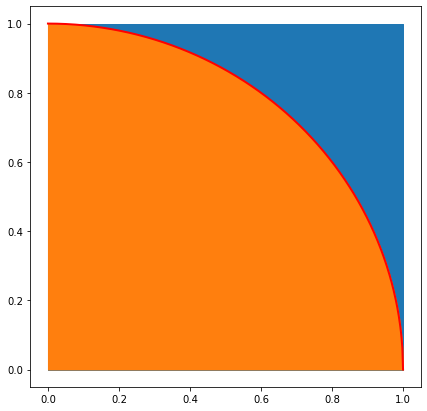

In [3]:
plot_area(lambda x: np.sqrt(1-x**2), 0,1)

We will use the area of the circle that contains pi to find pi  

$$ A_{circle} = \pi r^2 $$

We take only a fragment (1/4) of the circle.

$$ A_{circle\ part} = \frac{1}{4} \pi r^2 = \frac{1}{4} \pi 1^2 = \frac{1}{4} \pi $$

We also need a square area

$$ A_{square} = a^2 = 1^2 = 1 \\ $$

We find the ratio of the fields

$$ \frac{A_{circle\ part}}{A_{square}} = \frac{1}{4} \pi \\ $$

We transform to obtain the formula for pi

$$ \pi = 4 \frac{A_{circle\ part}}{A_{square}} $$

Now we approximate the ratio of the fields by the number of randomly generated points in the circle fragment and the number of all generated points

$$ \frac{A_{circle\ part}}{A_{square}} \approx \frac{m}{n} $$
where  
$ m $ - the number of points in the fragment of circle  
$ n $ - total number of points

What gives in the end
$$ \pi \approx 4 \frac{m}{n} $$

The more points we randomly generate with an uniform distribution, we should obtain a better approximation of pi.

In [4]:
def mc_pi(samples_size):
    samples = np.random.random((samples_size, 2))
    
    circle_counter = 0
    for p in samples:
        if p[0]**2 + p[1]**2 <= 1:
            circle_counter += 1
    
    return 4*circle_counter/samples_size, samples

In [5]:
pi, samples = mc_pi(10000)
pi

3.124

Randomly generated points:

In [6]:
def plot_f_samples(f, a,b, samples):
    xs = np.linspace(a,b,200)
    plt.scatter(samples[:,0], samples[:,1], s=2)
    plt.plot(xs, f(xs), color="red", linewidth=2)

    s2 = [s for s in samples 
          if s[1] > 0 and s[1] <= f(s[0]) or  s[1] < 0 and s[1] >= f(s[0])]
    s2 = np.stack(s2)
    plt.scatter(s2[:,0], s2[:,1], s=2)

    plt.show()

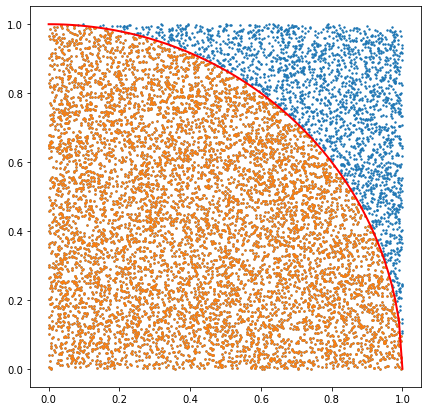

In [7]:
plt.figure(figsize=(7,7))
plot_f_samples(lambda x: np.sqrt(1-x**2), 0,1, samples)

## Calculating the definite integral - the area under the graph

### First method - randomly generated points

Monte Carlo method is used to calculate hard definite integrals, which cannot or are difficult to calculate analytically. Points are drawn from the uniform distribution and it is checked whether the drawn point is between the X-axis and the function curve, and when it is above 0, we add 1 to the counter, while when it is below 0, we subtract 1 from the counter.

We approximate the ratio of areas using the number of points randomly generated

$$ \frac{A_{function}}{A_{square}} \approx \frac{m}{n} $$

where  

$ m $ - the number of points between the OX axis and the function (if the point is above the x-axis then we increase counter by 1, if below the x-axis then we decrease counter by 1)  
$ n $ - total number of points

What gives us

$$ A_{function} \approx \frac{m}{n} A_{square} $$

In [8]:
def mc(f, a,b, samples_size):
    M = 0
    width = b-a
    
    vals = [f(x) for x in np.arange(a,b+0.01, 0.01)]
    v_max = max(0, np.max(vals))
    v_min = min(0, np.min(vals))
    
    samples = np.random.random((samples_size, 2))
    samples[:,0] = samples[:,0]*width + a
    samples[:,1] = samples[:,1]*(v_max-v_min) + v_min
    
    for p in samples:
        y = f(p[0])
        if p[1] > 0 and p[1] <= y:
            M += 1
        elif p[1] < 0 and p[1] >= y:
            M -= 1
    
    return M/samples_size * width*(v_max-v_min), samples

#### Simple function

$$ f(x) = x^2 $$

In [9]:
def f1(x):
    return x**2

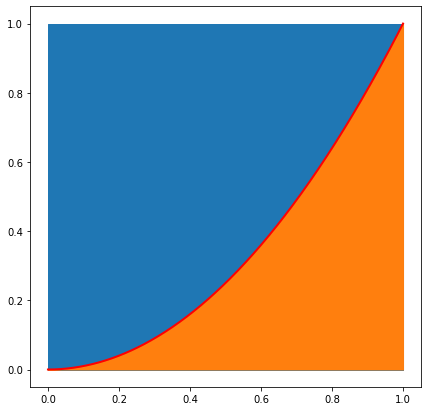

In [10]:
plot_area(f1, 0,1)

$$ \int_{0}^{1} x^2 dx = \left[ \frac{1}{3} x^3 \right]_0^1 = \frac{1}{3} $$

In [11]:
res, samples = mc(f1, 0,1, 10000)
res

0.3361

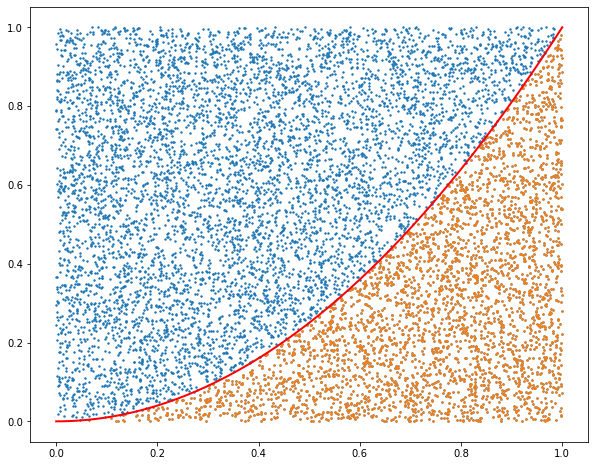

In [12]:
plot_f_samples(f1, 0,1, samples)

#### Difficult function

$$ f(x) = \ln(x) sin(e^x) $$

In [13]:
def f2(x):
    return np.log(x)*np.sin(np.exp(x))

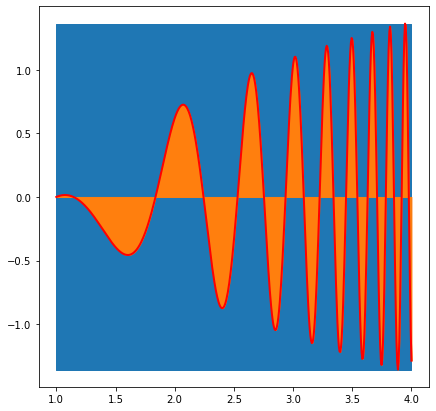

In [14]:
plot_area(f2, 1,4)

$$ \int_{1}^{4}\ln(x) sin(e^x) dx \approx -0.069 $$

In [15]:
res, samples = mc(f2, 1,4, 100000)
res

-0.06804442955260127

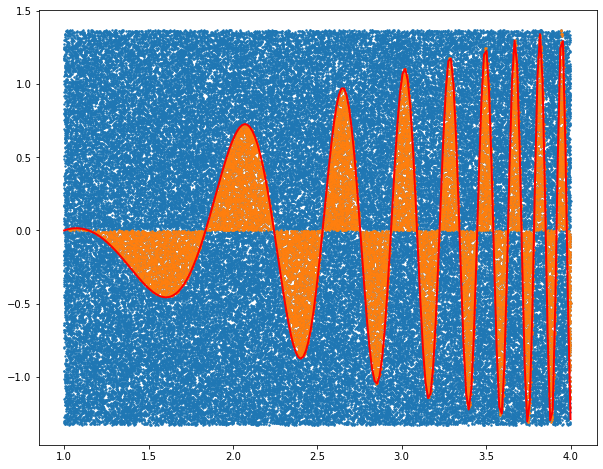

In [16]:
plot_f_samples(f2, 1,4, samples)

### Second method - expected value

In this method, we randomly generate the arguments of the function from the uniform distribution and then calculate the values of the function with these arguments and finally calculate the average. 

$$ E(g(x)) = \int_\Omega g(x)p(x) dx \approx \frac{1}{n} \sum_{i=1}^n g(x_i) $$
$$ x_i \sim p(x) $$

If we use uniform distribution then we will get

$$ \int_a^b f(x) dx = (b-a) \int_a^b f(x) * \frac{1}{b-a} dx = (b-a) \int_a^b f(x) p(x) dx \approx (b-a) \frac{1}{n} \sum_{i=1}^n f(x_i) $$
$$ x_i \sim p(x) = Unif(a,b) $$
$$ x_i \in [a,b] $$

In [17]:
def mc2(f, a,b, samples_size):
    samples = np.random.random(samples_size)
    samples = samples*(b-a) + a
    
    return (b-a)/samples_size * np.sum(f(samples)), samples

#### Simple function

$$ f(x) = x^2 $$

$$ \int_{0}^{1} x^2 dx = \left[ \frac{1}{3} x^3 \right]_0^1 = \frac{1}{3} $$

In [18]:
res, samples = mc2(f1, 0,1, 1000)
res

0.33428873776109014

The graph shows the randomly generated function arguments in blue, and the calculated function values in orange.

In [19]:
def plot_f_samples2(f, a,b, samples):
    xs = np.linspace(a,b,500)
    ys = f(xs)
    ysamples = f(samples)
    #plt.plot(xs, ys, color="red", linewidth=1, zorder=1)
    plt.scatter(samples, np.zeros(samples.size), s=1, zorder=2, color="blue")
    plt.scatter(samples, ysamples, s=1, zorder=2, color="orange")
    plt.show()

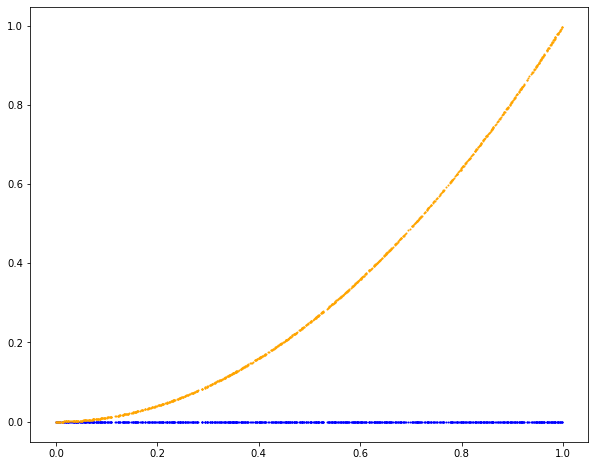

In [20]:
plot_f_samples2(f1, 0,1, samples)

#### Difficult function

$$ f(x) = \ln(x) sin(e^x) $$

$$ \int_{1}^{4}\ln(x) sin(e^x) dx \approx -0.069 $$

In [21]:
res, samples = mc2(f2, 1,4, 1000)
res

-0.12216612416252387

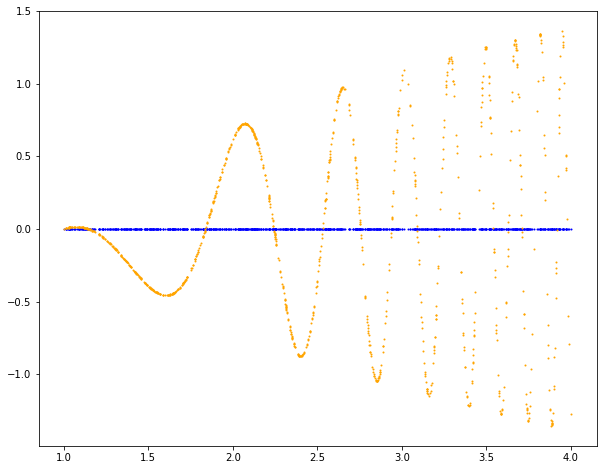

In [22]:
plot_f_samples2(f2, 1,4, samples)

More samples

In [23]:
res, samples = mc2(f2, 1,4, 100000)
res

-0.06320041897030633

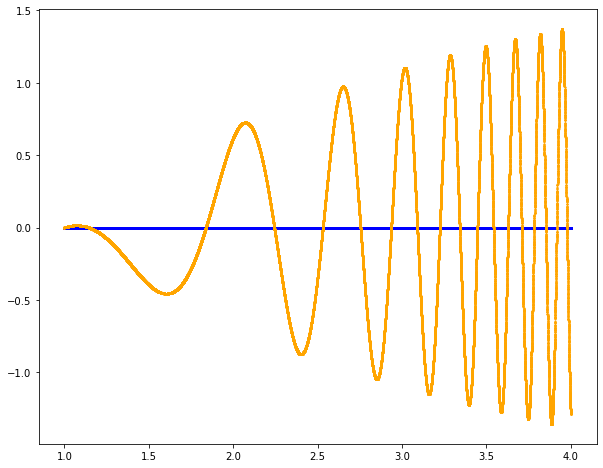

In [24]:
plot_f_samples2(f2, 1,4, samples)

## Calculating definite multiple integral - n-dimensional volume

### First method - randomly generated n-dimensional points

To calculate multiple integrals, the previous function must be extended

In [25]:
def mc_n(f, limits, samples_size):
    # f - function
    # limits - array of pairs of integration limits
    M = 0
    args_nr = limits.shape[0]
    
    step = 0.1
    grid = np.mgrid[tuple(slice(item[0], item[1]+step, step) for item in limits)]
    arr = np.array([item.flatten() for item in grid])
    points = np.vstack([*arr]).T
    vals = [f(*p) for p in points]
    
    v_max = max(0, np.nanmax(vals))
    v_min = min(0, np.nanmin(vals))
    height = v_max - v_min
    
    samples = np.random.random((samples_size, args_nr+1))
    for i in range(args_nr):
        samples[:,i] = samples[:,i]*(limits[i,1]-limits[i,0]) + limits[i,0]
    
    samples[:,args_nr] = samples[:,args_nr]*height + v_min
    
    for p in samples:
        y = f(*p[0:args_nr])
        if not np.isnan(y):
            if p[args_nr] > 0 and p[args_nr] <= y:
                M += 1
            elif p[args_nr] < 0 and p[args_nr] >= y:
                M -= 1
    
    base_area = np.product(limits[:,1] - limits[:,0])
    
    return M/samples_size * base_area*height, samples

#### Volume of semisphere 

$$ x^2 + y^2 + z^2 = r^2 $$  
$$ z = \sqrt{r^2 - x^2 - y^2} $$

In [26]:
def semisphere(x,y):
    r = 5
    s = x**2 + y**2
    if s <= r**2:
        return np.sqrt(r**2 - s)
    else:
        return np.nan

$$ V_{semisphere} = \frac{1}{2} * \frac{4}{3} \pi r^3 = \frac{2}{3} \pi r^3 $$

$$ r = 5 \\$$
$$ V_{semisphere} = \frac{2}{3} \pi\ 5^3 \approx 261.799 $$

In [27]:
r = 5
limits = np.array([
    [-r,r],
    [-r,r]
])
res, samples = mc_n(semisphere, limits, 10000)
res

261.05

In [28]:
def plot_f3d(f, limits, samples, beyond = False):
    ax = plt.axes(projection="3d")
    
    if beyond:
        s1 = np.array([s for s in samples 
                if not (s[2] > 0 and s[2] <= f(*s[0:2]) or s[2] < 0 and s[2] >= f(*s[0:2]))])
        s1 = np.stack(s1)
        ax.scatter3D(s1[:,0], s1[:,1], s1[:,2], color="blue")
    
    s2 = np.array([s for s in samples 
            if s[2] > 0 and s[2] <= f(*s[0:2]) or s[2] < 0 and s[2] >= f(*s[0:2])])
    s2 = np.stack(s2)
    ax.scatter3D(s2[:,0], s2[:,1], s2[:,2], color="orange")
    
    
    xs = np.linspace(limits[0,0],limits[0,1]+0.01, 30)
    ys = np.linspace(limits[1,0],limits[1,1]+0.01, 30)
    X, Y = np.meshgrid(xs, ys)
    Z = np.array([f(i,j) for j in ys for i in xs])
    ax.scatter3D(X,Y, Z, color="red")
    
    plt.show()

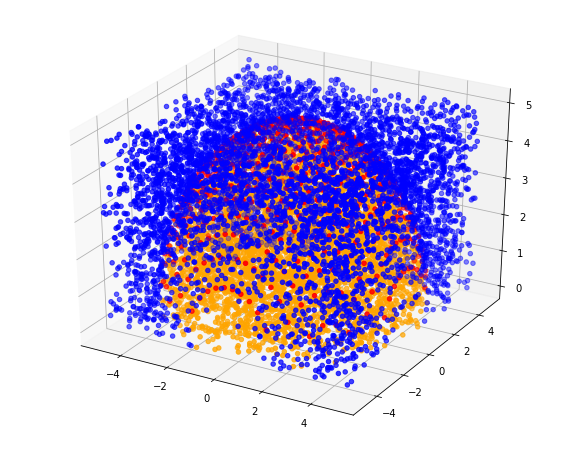

In [29]:
plot_f3d(semisphere, limits, samples, True)

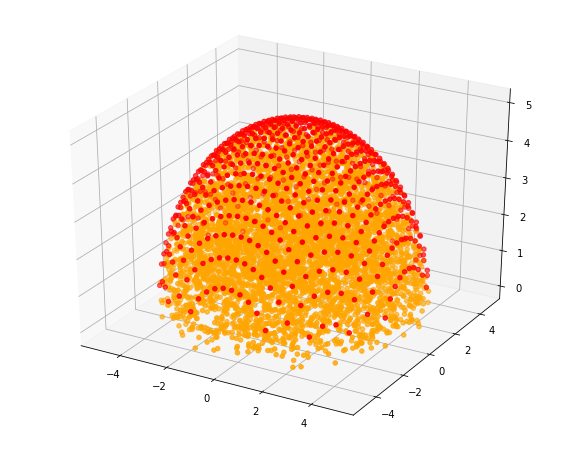

In [30]:
plot_f3d(semisphere, limits, samples)

#### Another three-dimensional function

$$ f(x,y) = sin^2(x) + cos^2(y) $$

In [31]:
def f3d(x,y):
    return np.sin(x)**2 + np.cos(y)**2

$$ \int_{-2}^2 \int_{-2}^2 \left(sin^2(x) + cos^2(y)\right) dx dy = 16 $$

In [32]:
limits = np.array([
    [-2,2], # x
    [-2,2] # y
])
res, samples = mc_n(f3d, limits, 20000)
res

16.19949111361002

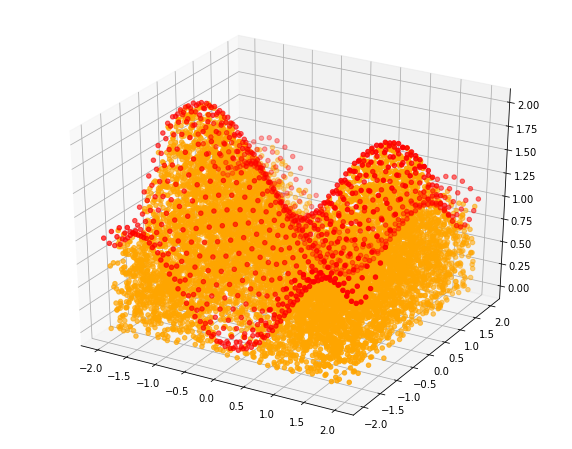

In [33]:
plot_f3d(f3d, limits, samples)

#### Integrals of even higher dimensions

$$ f(x,y,z) = sin^2(x) + cos^2(y) sin(z) $$

In [34]:
def f_3arg(x,y,z):
    return np.sin(x)**2 + np.cos(y)**2 * np.sin(z)

$$ \int_{-2}^{2}\int_{-2}^{2}\int_{-2}^{2}\left(sin^2(x) + cos^2(y) sin(z)\right) dxdydz \approx 38.0544 $$

In [35]:
limits = np.array([
    [-2,2], # x
    [-2,2], # y
    [-2,2] # z
])
res, samples = mc_n(f_3arg, limits, 10000)
res

37.648985557692924

$$ f(x,y,z,q) = sin^2(x) + cos^2(y) sin(z) + q^2 $$

In [36]:
def f_4arg(x,y,z,q):
    return np.sin(x)**2 + np.cos(y)**2 * np.sin(z) + q**2

$$ \int_{-2}^{2}\int_{-1}^{4}\int_{-3}^{2}\int_{1}^{2} \left( sin^2(x) + cos^2(y) sin(z) + q^2 \right) dx dy dz dq \approx 235.688 $$

In [37]:
limits = np.array([
    [1,2], # x
    [-3,2], # y
    [-1,4], # z
    [-2,2] # q
])
res, samples = mc_n(f_4arg, limits, 50000)
res

235.43655989562632

### Second method - expected value in multidimensional function

To calculate multiple integrals, the previous function must be extended

In [38]:
def mc_n2(f, limits, samples_size):
    args_nr = limits.shape[0]
    
    samples = np.random.random((samples_size, args_nr))
    for i in range(args_nr):
        samples[:,i] = samples[:,i]*(limits[i,1]-limits[i,0]) + limits[i,0]
    
    sum = 0
    for arg in samples:
        y = f(*arg)
        if not np.isnan(y):
            sum += y
    
    base_area = np.product(limits[:,1] - limits[:,0])
    return base_area/samples_size * sum, samples

$$ V_{semisphere} = \frac{2}{3} \pi\ 5^3 \approx 261.799 $$

In [39]:
r = 5
limits = np.array([
    [-r,r],
    [-r,r]
])
res, samples = mc_n2(semisphere, limits, 10000)
res

257.462109263716

The graph shows the randomly generated function arguments in blue, and the calculated function values in orange.

In [40]:
def plot_f3d2(f, limits, samples):
    ax = plt.axes(projection="3d")
    
    samples_size = samples.shape[0]
    ysamples = np.empty(samples_size)
    for i in range(samples_size):
        ysamples[i] = f(samples[i,0], samples[i,1])
    
    ax.scatter3D(samples[:,0], samples[:,1], np.zeros(samples_size), color="blue")
    ax.scatter3D(samples[:,0], samples[:,1], ysamples, color="orange")
    
    xs = np.linspace(limits[0,0],limits[0,1]+0.01, 30)
    ys = np.linspace(limits[1,0],limits[1,1]+0.01, 30)
    
    plt.show()

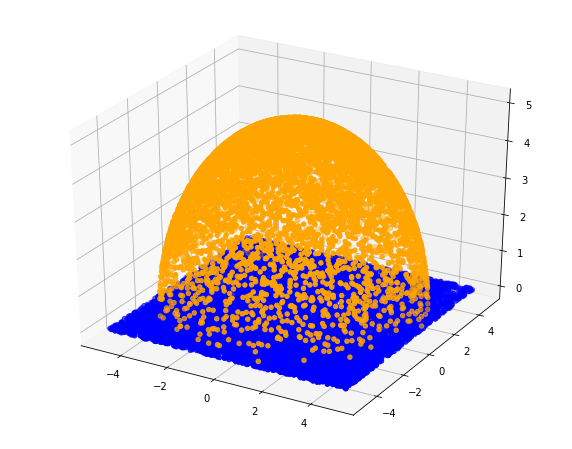

In [41]:
plot_f3d2(semisphere, limits, samples)

$$ \int_{-2}^2 \int_{-2}^2 \left(sin^2(x) + cos^2(y)\right) dx dy = 16 $$

In [42]:
limits = np.array([
    [-2,2], # x
    [-2,2] # y
])
res, samples = mc_n2(f3d, limits, 10000)
res

16.046881033749347

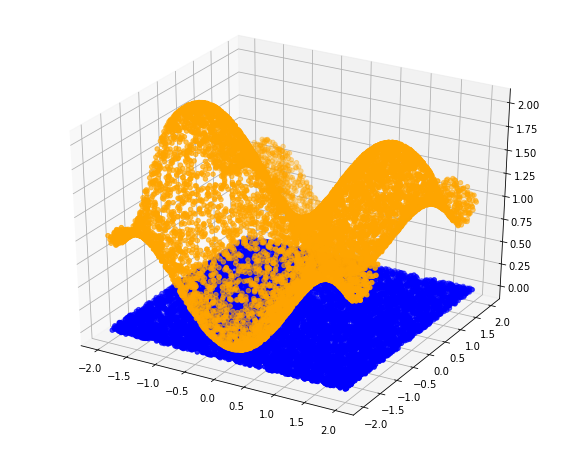

In [43]:
plot_f3d2(f3d, limits, samples)

$$ \int_{-2}^{2}\int_{-2}^{2}\int_{-2}^{2}\left(sin^2(x) + cos^2(y) sin(z)\right) dxdydz \approx 38.0544 $$

In [44]:
limits = np.array([
    [-2,2], # x
    [-2,2], # y
    [-2,2] # z
])
res, samples = mc_n2(f_3arg, limits, 10000)
res

38.147837493298816

$$ \int_{-2}^{2}\int_{-1}^{4}\int_{-3}^{2}\int_{1}^{2} \left( sin^2(x) + cos^2(y) sin(z) + q^2 \right) dx dy dz dq \approx 235.688 $$

In [45]:
limits = np.array([
    [1,2], # x
    [-3,2], # y
    [-1,4], # z
    [-2,2] # q
])
res, samples = mc_n2(f_4arg, limits, 50000)
res

236.28385524088938